# Find distance relations from distribution fitting

In [17]:
import os
import glob
import numpy as np
import json

## Configurations


In [18]:
results_dir = "../results/dgx_threadpool_trial"
music_name = 'mahler_'


In [19]:
config_path_list = glob.glob(
    os.path.join(results_dir, '**', music_name+'*.json'),
    recursive=True
)

## Extract data

In [20]:
data_list = []

for file_path in config_path_list:
    try:
        with open(file_path) as f:
            config = json.load(f)
        
        # pos = config.get('pos_grid')
        # pos = int(f"{pos[0]}{pos[1]}{pos[2]}")
        dist = config.get('dist_mic')
        shape, scale, location = config.get('pareto_params').values()
        
        data_single = [dist, shape, scale, location]
        data_list.append(data_single)

        with open(file_path, 'w') as f:
            json.dump(config, f, indent=4)

    except FileNotFoundError:
        print("JSON file not found:", file_path)


In [21]:
data_arr = np.array(data_list)

dist_arr = data_arr[:, 0]
shape_arr = data_arr[:, 1]
scale_arr = data_arr[:, 2]

## Plotting

In [22]:
import matplotlib.pyplot as plt

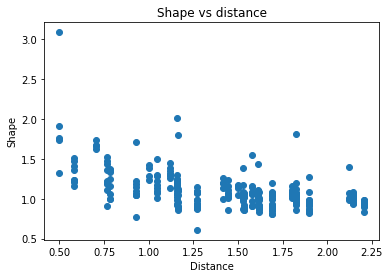

In [23]:
# Plot shape vs distance

plt.figure()
plt.scatter(dist_arr, shape_arr)
plt.title('Shape vs distance')
plt.ylabel('Shape')
plt.xlabel('Distance')
plt.show()

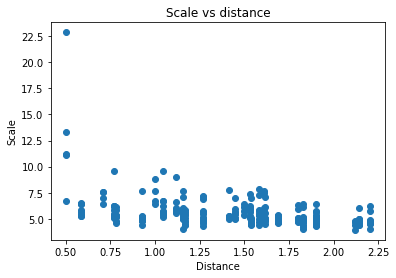

In [24]:
# Plot scale vs distance

plt.figure()
plt.scatter(dist_arr, scale_arr)
plt.title('Scale vs distance')
plt.ylabel('Scale')
plt.xlabel('Distance')
plt.show()